# Nonlinear Spectral Analysis (NSA) of FD-WENO schemes

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

Consider the one-dimensional hyperbolic conservation law for a scalar field \\( u(x,t), x\in[0,L] \\),
\begin{align}
    \frac{\partial u}{\partial t}+\frac{\partial\phi}{\partial x}=0\tag{1}
\end{align}

In [2]:
# Domain length
L = 2.0 * np.pi

In [3]:
# Number of grid points
N = 64

In [4]:
# (Uniform) grid spacing
h = L / (N-1)

In [5]:
# Positions of grid points i
#x = np.linspace(h/2.0, L-h/2.0, N)
x = np.linspace(0, L, N)

The impact of the nonlinearity on the modified wavenumber will be investigated by means of an artificial or synthetic field for \\( u(x) \\), containing a predefined spectrum of Fourier modes.

The one-dimensional synthetic field \\( u(x),0\leq x\leq 2\pi \\) is constructed such that its energy spectrum \\( E_u(\kappa) \\) follows a predefined inertial range scaling
\begin{align}
    E_u(\kappa)
\end{align}

In the previous expressions, \\( \kappa_{max}=\frac{\pi}{\Delta} \\) denotes the maximum wavenumber of an equidistant computational grid with grid
spacing \\( \Delta \\).

In [6]:
# Maximum wavenumber of the grid
kMax = np.pi / h

For the basic analysis, the cutoff wavenumber is chosen as the maximum wavenumber of the computational grid, i.e. \\( \kappa_c=\kappa_{max}=\frac{\pi}{\Delta}\\).

In [7]:
# Cutoff wavenumber
kC = kMax

In [36]:
# Phase of each mode, phase function
phiU = np.zeros(2*N)
phiU[:N] = np.random.uniform(-np.pi, np.pi, N)
phiU[N:] = np.flip(phiU[:N])
print(phiU)

[ 1.85182583e+00 -1.59525142e+00  1.45071461e+00 -8.41042126e-01
  6.92664393e-01  1.03749737e+00 -1.18766112e+00 -1.97449531e-01
 -1.33562775e-03  5.76770956e-01 -1.03334321e-01  2.24696850e-01
  2.58836745e+00 -2.69378398e+00 -4.21768781e-01 -2.00217767e+00
 -6.06613951e-02  2.80633022e-01  1.66566408e-01 -1.54634550e+00
 -9.94715921e-01  9.17796239e-02 -3.03967960e+00 -2.73065517e-01
 -5.94065475e-01  1.61741103e+00  5.55223350e-01 -3.00171873e+00
 -2.92455091e+00  5.86971056e-01 -2.19544745e-02 -2.55684492e+00
  9.17170313e-01 -1.66300449e+00 -1.22002601e+00 -3.12945390e+00
 -5.85653554e-01  2.44667913e-01  1.94106393e+00  1.20411708e+00
 -1.39876289e-01 -1.99053106e+00 -4.14844029e-01  1.02723989e+00
 -2.19328954e+00  6.43618346e-01 -7.20321154e-01  2.76373620e+00
 -1.78512629e+00 -1.65143167e+00  1.65221396e-02 -8.48191423e-01
 -2.81956381e-03 -2.93210611e+00 -1.23115353e+00 -1.37301410e+00
 -2.90123330e+00 -1.21348033e+00 -1.85432634e-01  1.26941021e-01
 -2.65450981e+00 -2.50396

In the following, we consider the slope of the turbulent energy spectrum, i.e. \\( \alpha=-5/3 \\).

In [9]:
# Slope of the turbulent energy spectrum
alpha = -5/3

in which \\( U_0 \\) is a proportionality factor that can be chosen freely.

In [10]:
# Proportionality factor
U0 = 1.0

In [35]:
fMax = kMax / (2 * np.pi)
df = fMax / N
freqs = np.fft.fftfreq(2*N, h)
print(df)
print(fMax)
print(freqs[0:])
print(freqs[0:N+1].size)

0.07833407355304223
5.0133807073947025
[ 0.          0.07833407  0.15666815  0.23500222  0.31333629  0.39167037
  0.47000444  0.54833851  0.62667259  0.70500666  0.78334074  0.86167481
  0.94000888  1.01834296  1.09667703  1.1750111   1.25334518  1.33167925
  1.41001332  1.4883474   1.56668147  1.64501554  1.72334962  1.80168369
  1.88001777  1.95835184  2.03668591  2.11501999  2.19335406  2.27168813
  2.35002221  2.42835628  2.50669035  2.58502443  2.6633585   2.74169257
  2.82002665  2.89836072  2.9766948   3.05502887  3.13336294  3.21169702
  3.29003109  3.36836516  3.44669924  3.52503331  3.60336738  3.68170146
  3.76003553  3.8383696   3.91670368  3.99503775  4.07337182  4.1517059
  4.23003997  4.30837405  4.38670812  4.46504219  4.54337627  4.62171034
  4.70004441  4.77837849  4.85671256  4.93504663 -5.01338071 -4.93504663
 -4.85671256 -4.77837849 -4.70004441 -4.62171034 -4.54337627 -4.46504219
 -4.38670812 -4.30837405 -4.23003997 -4.1517059  -4.07337182 -3.99503775
 -3.91670368 

In [12]:
kappa = 2 * np.pi * np.abs(freqs)
print(kappa)
kappa.size

[ 0.         0.4921875  0.984375   1.4765625  1.96875    2.4609375
  2.953125   3.4453125  3.9375     4.4296875  4.921875   5.4140625
  5.90625    6.3984375  6.890625   7.3828125  7.875      8.3671875
  8.859375   9.3515625  9.84375   10.3359375 10.828125  11.3203125
 11.8125    12.3046875 12.796875  13.2890625 13.78125   14.2734375
 14.765625  15.2578125 15.75      16.2421875 16.734375  17.2265625
 17.71875   18.2109375 18.703125  19.1953125 19.6875    20.1796875
 20.671875  21.1640625 21.65625   22.1484375 22.640625  23.1328125
 23.625     24.1171875 24.609375  25.1015625 25.59375   26.0859375
 26.578125  27.0703125 27.5625    28.0546875 28.546875  29.0390625
 29.53125   30.0234375 30.515625  31.0078125 31.5       31.0078125
 30.515625  30.0234375 29.53125   29.0390625 28.546875  28.0546875
 27.5625    27.0703125 26.578125  26.0859375 25.59375   25.1015625
 24.609375  24.1171875 23.625     23.1328125 22.640625  22.1484375
 21.65625   21.1640625 20.671875  20.1796875 19.6875    19.195

128

In [13]:
# Synthetic field in Fourier space U(k)
U = np.zeros(2*N, dtype=complex)
U[1:] =  np.sqrt(U0) * (1+1j*np.tan(phiU[1:])) / np.sqrt(1+(np.tan(phiU[1:]))**2) * np.power(kappa[1:], alpha/2)

In [14]:
# Synthetic field in physical space u(x)
u = np.fft.ifft(U) # Take only the real part?

In [15]:
# Overrite u(x) with simple cosine test function
#u = 1.0 * np.cos(x)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


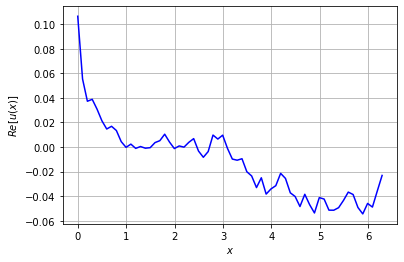

In [16]:
# Plot the scalar field u(x)
plt.plot(x, u[:N], 'b')
plt.xlabel('$x$')
plt.ylabel('$Re[u(x)]$')
plt.grid(True)
plt.show()

The flux \\( \phi \\) is determined as \\( \phi=vu \\), with the transporting velocity \\( v(x,t) \\). For the numerical experiments, we take \\( v\\) constant.

In [40]:
# Constant transporting velocity v(x,t) = v
v = 1.0

In [41]:
# Evaluate the fluxes at the grid points
phi = v * u

## Flux splitting

The flux splitting can be accomplished in different ways. Often, the Lax–Friederichs flux splitting is used, i.e.
\begin{align}
    \phi^+(u)&=\frac{1}{2}(\phi(u)+\theta u)\tag{12}\\
    \phi^-(u)&=\frac{1}{2}(\phi(u)-\theta u)\tag{13}
\end{align}

In [58]:
# Determine maximum wave speed
theta = abs(v)

In [59]:
# Split the fluxes at the grid points
phiP = 0.5 * (phi + theta*u)
phiM = 0.5 * (phi - theta*u)

## WENO reconstruction

The smoothness indicators are determined by the relations \\((19) - (24)\\).

In [60]:
# Compute smoothness indicators
b0p = 13/12 * (np.roll(phiP, 2) - 2*np.roll(phiP, 1) + np.roll(phiP, 0))**2 + 1/4 * (1*np.roll(phiP,2) - 4*np.roll(phiP, 1) + 3*np.roll(phiP, 0))**2
b1p = 13/12 * (np.roll(phiP, 1) - 2*np.roll(phiP, 0) + np.roll(phiP,-1))**2 + 1/4 * (1*np.roll(phiP,1) - 1*np.roll(phiP,-1)                     )**2
b2p = 13/12 * (np.roll(phiP, 0) - 2*np.roll(phiP,-1) + np.roll(phiP,-2))**2 + 1/4 * (3*np.roll(phiP,0) - 4*np.roll(phiP,-1) + 1*np.roll(phiP,-2))**2

b0m = 13/12 * (np.roll(phiM,-1) - 2*np.roll(phiM,-2) + np.roll(phiM,-3))**2 + 1/4 * (3*np.roll(phiM,2) - 4*np.roll(phiM,-2) + 1*np.roll(phiM,-3))**2
b1m = 13/12 * (np.roll(phiM, 0) - 2*np.roll(phiM,-1) + np.roll(phiM,-2))**2 + 1/4 * (1*np.roll(phiM,1) - 1*np.roll(phiM,-2)                     )**2
b2m = 13/12 * (np.roll(phiM, 1) - 2*np.roll(phiM, 0) + np.roll(phiM,-1))**2 + 1/4 * (1*np.roll(phiM,0) - 4*np.roll(phiM, 0) + 3*np.roll(phiM,-1))**2

For the 5th-order WENO scheme, \\( c_0=\frac{1}{10},\quad c_1=\frac{6}{10},\quad c_2=\frac{3}{10} \\).

In [61]:
# Optimal weights
c0 = 1/10
c1 = 6/10
c2 = 3/10

\\( \epsilon \\) is a small positive number, recommended to be at least \\( 10^{-15} \\) and necessary to avoid singularities in the method.

In [62]:
# Small positive number
eps = 10e-16

In order to achieve a convex combination of Essentially Non-Oscillatory (ENO) stencils, the normalized weighting coefficients \\( w_k^\pm \\) are determined by
\begin{align}
    w_k^\pm=\frac{\alpha_k^\pm}{\alpha_0^\pm+\alpha_1^\pm+\alpha_2^\pm},\quad\alpha_k^\pm=\frac{c_k}{\epsilon+\beta_k^\pm},\quad k=0,1,2,\tag{18}
\end{align}
in which the \\( \beta_k^\pm \\)represent local indicators of the smoothness of the flux.

In [63]:
# Compute nonlinear weights
a0p = c0 / (eps + b0p)
a1p = c1 / (eps + b1p)
a2p = c2 / (eps + b2p)

a0m = c0 / (eps + b0m)
a1m = c1 / (eps + b1m)
a2m = c2 / (eps + b2m)

In [64]:
# Normalize weights
w0p = a0p / (a0p + a1p + a2p)
w1p = a1p / (a0p + a1p + a2p)
w2p = a2p / (a0p + a1p + a2p)

w0m = a0m / (a0m + a1m + a2m)
w1m = a1m / (a0m + a1m + a2m)
w2m = a2m / (a0m + a1m + a2m)

The positive and negative numerical fluxes are obtained as a weighting between 3 basic flux definitions, giving \\( (14)-(17) \\).

In [65]:
# Compute positive and negative numerical fluxes at the intermediate positions right of the grid point i
phiRp = w0p * (( 2*np.roll(phiP, 2) - 7*np.roll(phiP, 1) + 11*np.roll(phiP, 0)) / 6) + w1p * ((-1*np.roll(phiP, 1) + 5*np.roll(phiP, 0) + 2*np.roll(phiP,-1)) / 6) + w2p * (( 2*np.roll(phiP, 0) + 5*np.roll(phiP,-1) - 1*np.roll(phiP,-2)) / 6)
phiRm = w0m * ((11*np.roll(phiM,-1) - 7*np.roll(phiM,-2) +  2*np.roll(phiM,-3)) / 6) + w1m * (( 2*np.roll(phiM, 0) + 5*np.roll(phiM,-1) - 1*np.roll(phiM,-2)) / 6) + w2m * ((-1*np.roll(phiM, 1) + 5*np.roll(phiM, 0) + 2*np.roll(phiM,-1)) / 6)

In [66]:
# Compute total numerical fluxes at the intermediate positions right of the grid point i
phiR = phiRp + phiRm

In [67]:
# Overrite results with simple backward differencing
#phiR = phi

In [68]:
# Compute total numerical fluxes at the intermediate positions left of the grid point i
phiL = np.roll(phiR, 1)

## Differencing

In general, the discretization of the convective term in a node \\( i \\) of the computational grid with uniform grid spacing \\( \Delta x \\) can be expressed as the differential balance of fluxes at the intermediate positions \\( i\pm\frac{1}{2} \\). The 5th-order Weighted Essentially Non-Oscillatory (WENO) scheme for the convective term is constructed by first splitting the flux \\( \phi \\) in expression \\( (2) \\) into a positive and negative contribution, \\( \phi^+(u) \\) and \\( \phi^-(u) \\), such that
\begin{align}
        \left.\frac{\partial\phi}{\partial x}\right|_i=\frac{\phi_{i+\frac{1}{2}}-\phi_{i-\frac{1}{2}}}{\Delta x}=\frac{(\phi_{i+\frac{1}{2}}^{+}+\phi_{i+\frac{1}{2}}^{-})-(\phi_{i-\frac{1}{2}}^{+}+\phi_{i-\frac{1}{2}}^{-})}{\Delta x}\tag{2,11}
\end{align}

In [69]:
# Compute the discretization of the convective term
DphiDx = (phiR - phiL) / h

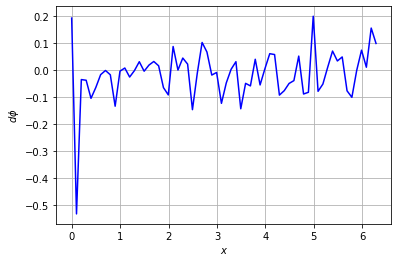

In [70]:
# Plot the result
plt.plot(x, DphiDx[:N], 'b')
plt.xlabel('$x$')
plt.ylabel('$d\phi$')
plt.grid(True)
plt.show()

The modified wavenumber \\( \kappa^\prime \\) of any linear or nonlinear discretization \\( \frac{\partial u}{\partial x} \\) of the first derivative is determined as
\begin{align}
    \kappa^\prime(\kappa)=\frac{1}{i\hat{u}(\kappa)}\mathcal{F}\left\{\frac{\partial u}{\partial x}\right\},\quad\forall\kappa\leq\kappa_c\tag{31}
\end{align}

In [71]:
# Modified wavenumber
kD = np.zeros((2,2*N), dtype=complex)
kD[1,1:] = 1 / (1j * U[1:]) * np.fft.fft(DphiDx)[1:]

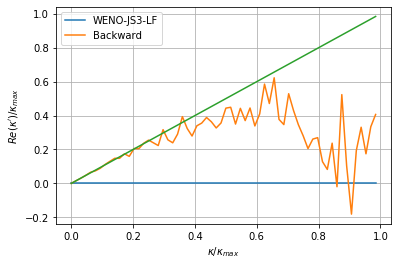

In [72]:
# Plot the real part of the modified wavenumber
plt.plot(kappa[:N]/kMax, np.real(kD[0,:N])/kMax)
plt.plot(kappa[:N]/kMax, np.real(kD[1,:N])/kMax)
plt.plot(kappa[:N]/kMax, kappa[:N]/kMax)
plt.xlabel('$\kappa/\kappa_{max}$')
plt.ylabel('$Re(\kappa^\prime)/\kappa_{max}$')
plt.grid(True)
plt.legend(['WENO-JS3-LF','Backward'])
plt.show()

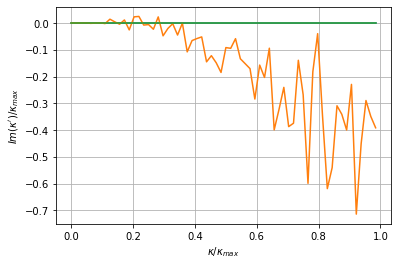

In [73]:
# Plot the imaginary part of the modified wavenumber
plt.plot(kappa[:N]/kMax, np.imag(kD[0,:N])/kMax)
plt.plot(kappa[:N]/kMax, np.imag(kD[1,:N])/kMax)
plt.plot(kappa[:N]/kMax, np.zeros(N))
plt.xlabel('$\kappa/\kappa_{max}$')
plt.ylabel('$Im(\kappa^\prime)/\kappa_{max}$')
plt.grid(True)
plt.show()